/var/folders/pb/_0h8x45x091307x0pwzykw8h0000gn/T/ipykernel_79226/853477244.py:42: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


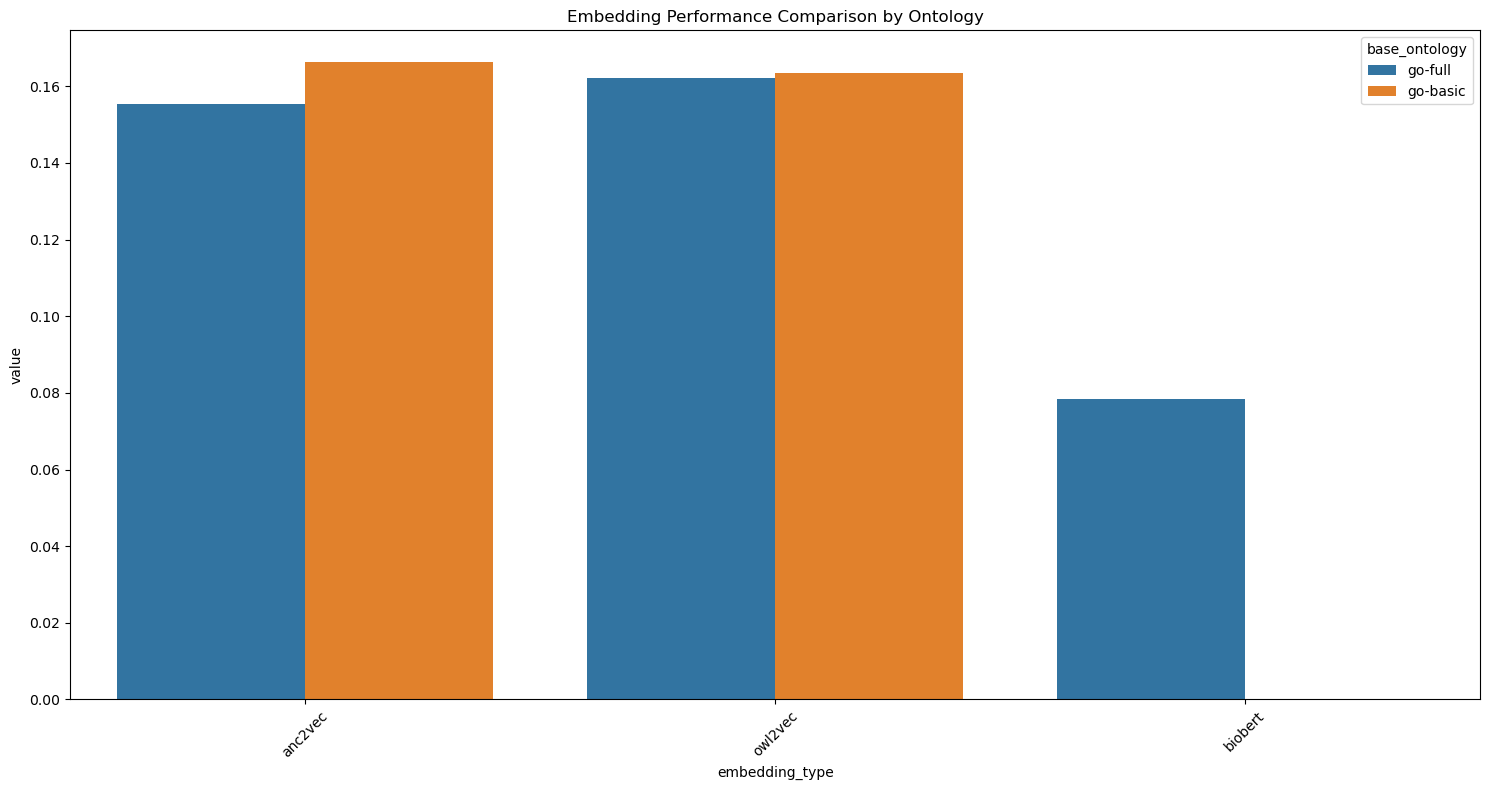


Detailed Results:
metric                                      Hits@1  Hits@10  Hits@5    MRR
base_ontology embedding_type model                                        
go-basic      anc2vec        MLPClassifier   0.035    0.322   0.185  0.123
              owl2vec        MLPClassifier   0.043    0.303   0.184  0.125
go-full       anc2vec        MLPClassifier   0.035    0.299   0.171  0.117
              biobert        MLPClassifier   0.016    0.155   0.077  0.066
              owl2vec        MLPClassifier   0.042    0.301   0.183  0.123


In [7]:
import wandb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List, Dict

# Initialize wandb
api = wandb.Api()

# Get runs from your project
runs = api.runs("go-embedding-evaluation")  # Replace with your actual project name

# Collect data
data = []
for run in runs:
    config = run.config
    # Get the last logged metrics
    history = run.history()
    if not history.empty:
        # Extract metrics for each embedding type and model
        for _, metrics in history.iterrows():
            metrics_dict = metrics.to_dict()
            for key, value in metrics_dict.items():
                if isinstance(value, (int, float)):  # Filter out non-numeric values
                    # Parse the metric key (format: "embedding_type/model/metric")
                    parts = key.split('/')
                    if len(parts) == 3:
                        embedding_type, model, metric = parts
                        if model == 'MLPClassifier':
                            data.append({
                                'base_ontology': config.get('base_ontology', 'unknown'),
                                'embedding_type': embedding_type,
                                'model': model,
                                'metric': metric,
                                'value': value
                            })
# Convert to DataFrame
df = pd.DataFrame(data)

# Create visualization
plt.figure(figsize=(15, 8))
sns.barplot(
    data=df[df['metric'].isin(['MRR', 'Hits@1', 'Hits@5', 'Hits@10'])],
    x='embedding_type',
    y='value',
    hue='base_ontology',
    ci=None
)
plt.title('Embedding Performance Comparison by Ontology')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create summary table
summary_table = df.pivot_table(
    index=['base_ontology', 'embedding_type', 'model'],
    columns='metric',
    values='value',
    aggfunc='mean'
).round(3)

# Display the table
print("\nDetailed Results:")
print(summary_table)

# Optionally save to CSV
summary_table.to_csv('embedding_evaluation_results.csv')

In [3]:

# Collect data
data = []
for run in runs:
    config = run.config
    # Get the last logged metrics
    history = run.history()
    if not history.empty:
        print(history)

   anc2vec/DecisionTreeClassifier/MRR  anc2vec/LogisticRegression/Hits@10  \
0                                 NaN                                 NaN   
1                                 NaN                            0.000932   
2                                 NaN                                 NaN   
3                            0.000835                                 NaN   

   anc2vec/MLPClassifier/Hits@10  anc2vec/LogisticRegression/MRR  \
0                       0.291828                             NaN   
1                            NaN                        0.000842   
2                            NaN                             NaN   
3                            NaN                             NaN   

   anc2vec/LogisticRegression/Hits@5  anc2vec/CalibratedClassifierCV/Hits@10  \
0                                NaN                                     NaN   
1                           0.000388                                     NaN   
2                                